In [8]:
import geopandas as gpd
import numpy as np
import pandas as pd
import pygeos


In [2]:
# Open the shapefile
buildings = gpd.GeoDataFrame.from_file('../data/buildings.json')


In [3]:
buildings


,BUILDING,ADDR_CITY,A_STRT,A_SBRB,A_HSNMBR,ADDR_PLACE,A_PSTCD,B_LEVELS,NAME,NAME_EN,NAME_RU,OSM_TYPE,OSM_ID,geometry
0,yes,,улица Заломова,,2,,603109,7,Азимут,Azimuth,,relation,572514,"POLYGON ((43.98119 56.32374, 43.98120 56.32377..."
1,kindergarten,,Верхнепечёрская улица,,3А,,,4,,,,relation,377859,"POLYGON ((44.06520 56.29747, 44.06520 56.29745..."
2,school,,Советская улица,,9Б,,,3,,,,relation,556768,"POLYGON ((43.45735 56.25603, 43.45728 56.25580..."
3,garages,,,,,,,1,,,,relation,2380557,"POLYGON ((43.92713 56.29460, 43.92703 56.29458..."
4,yes,,,,,,,1,,,,relation,2388500,"POLYGON ((43.94392 56.29303, 43.94392 56.29308..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543086,yes,,,,,,,,,,,relation,1982228,"POLYGON ((44.30004 56.03476, 44.30018 56.03475..."
543087,yes,,улица Кащенко,,4,,,,,,,relation,1633775,"POLYGON ((43.98210 56.24753, 43.98214 56.24752..."
543088,yes,,Малая Ямская улица,,1,,,,,,,relation,1761909,"POLYGON ((43.98186 56.31665, 43.98240 56.31628..."
543089,yes,,,,,,,,,,,relation,2006094,"POLYGON ((43.94974 56.30340, 43.94995 56.30340..."


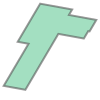

In [4]:
buildings.iloc[0]['geometry']


In [5]:
geocoded_data = pd.read_csv('../data/geocoded_data.csv', sep=';')
geocoded_data


,address,floor_count_max,is_alarm,built_year,Lat,Lon
0,д. г Навашино ул Соболева д.12,2.0,Нет,1954.0,52.013247,23.099710
1,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1917.0,55.235595,43.095463
2,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.234774,43.094960
3,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.233054,43.096613
4,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1970.0,55.232484,43.094367
...,...,...,...,...,...,...
22516,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",3.0,Нет,1960.0,57.680099,46.597824
22517,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1975.0,57.679579,46.596539
22518,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1981.0,57.677732,46.593018
22519,"обл. Нижегородская, г. Шахунья, ш. Яранское, д...",2.0,Нет,1976.0,57.659796,46.601300


In [9]:
geocoded_data['coords'] = geocoded_data['coords'] = list(zip(geocoded_data['Lon'], geocoded_data['Lat']))
geocoded_data['coords'] = geocoded_data['coords'].apply(pygeos.points)
points = gpd.GeoDataFrame(geocoded_data, geometry='coords', crs=buildings.crs)


In [10]:
points


,address,floor_count_max,is_alarm,built_year,Lat,Lon,coords
0,д. г Навашино ул Соболева д.12,2.0,Нет,1954.0,52.013247,23.099710,POINT (23.09971 52.01325)
1,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1917.0,55.235595,43.095463,POINT (43.09546 55.23560)
2,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.234774,43.094960,POINT (43.09496 55.23477)
3,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.233054,43.096613,POINT (43.09661 55.23305)
4,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1970.0,55.232484,43.094367,POINT (43.09437 55.23248)
...,...,...,...,...,...,...,...
22516,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",3.0,Нет,1960.0,57.680099,46.597824,POINT (46.59782 57.68010)
22517,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1975.0,57.679579,46.596539,POINT (46.59654 57.67958)
22518,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1981.0,57.677732,46.593018,POINT (46.59302 57.67773)
22519,"обл. Нижегородская, г. Шахунья, ш. Яранское, д...",2.0,Нет,1976.0,57.659796,46.601300,POINT (46.60130 57.65980)


In [11]:
gpd.options.use_pygeos = True


In [ ]:
buildings


In [17]:
# Perform spatial join to match points and polygons
pointInPolys = gpd.tools.sjoin(points, buildings[['OSM_ID', 'geometry']], op="within", how='left')


/Users/admin/opt/anaconda3/envs/cartopy-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [18]:
pointInPolys


,address,floor_count_max,is_alarm,built_year,Lat,Lon,coords,index_right,OSM_ID
0,д. г Навашино ул Соболева д.12,2.0,Нет,1954.0,52.013247,23.099710,POINT (23.09971 52.01325),NaN,NaN
1,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1917.0,55.235595,43.095463,POINT (43.09546 55.23560),NaN,NaN
2,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.234774,43.094960,POINT (43.09496 55.23477),NaN,NaN
3,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1977.0,55.233054,43.096613,POINT (43.09661 55.23305),476446.0,158514722.0
4,"обл. Нижегородская, р-н. Ардатовский, рп. Арда...",2.0,Нет,1970.0,55.232484,43.094367,POINT (43.09437 55.23248),476635.0,158483288.0
...,...,...,...,...,...,...,...,...,...
22516,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",3.0,Нет,1960.0,57.680099,46.597824,POINT (46.59782 57.68010),446398.0,197044242.0
22517,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1975.0,57.679579,46.596539,POINT (46.59654 57.67958),446362.0,197044235.0
22518,"обл. Нижегородская, г. Шахунья, ул. Энгельса, ...",2.0,Нет,1981.0,57.677732,46.593018,POINT (46.59302 57.67773),446418.0,197044243.0
22519,"обл. Нижегородская, г. Шахунья, ш. Яранское, д...",2.0,Нет,1976.0,57.659796,46.601300,POINT (46.60130 57.65980),24807.0,479267009.0


In [19]:
pointInPolys = pointInPolys.dropna().groupby('OSM_ID').first().reset_index()
pointInPolys['OSM_ID'] = pointInPolys['OSM_ID'].astype(int)
pointInPolys


,OSM_ID,address,floor_count_max,is_alarm,built_year,Lat,Lon,coords,index_right
0,1540694,"обл. Нижегородская, г. Нижний Новгород, ул. Ро...",10.0,Нет,2005.0,56.301229,44.077708,POINT (44.07771 56.30123),18.0
1,1540701,"обл. Нижегородская, г. Нижний Новгород, ул. Ро...",12.0,Нет,2007.0,56.305050,44.078903,POINT (44.07890 56.30505),9.0
2,1542309,"обл. Нижегородская, г. Нижний Новгород, ул. Ге...",9.0,Нет,1986.0,56.314647,44.053606,POINT (44.05361 56.31465),543075.0
3,1542312,"обл. Нижегородская, г. Нижний Новгород, ул. Ге...",9.0,Нет,1980.0,56.315191,44.048791,POINT (44.04879 56.31519),543074.0
4,1543594,"обл. Нижегородская, г. Нижний Новгород, ул. Ил...",3.0,Нет,1917.0,56.327955,43.993697,POINT (43.99370 56.32796),543085.0
...,...,...,...,...,...,...,...,...,...
20102,759795343,"обл. Нижегородская, р-н. Володарский, рп. Фрол...",1.0,Нет,1917.0,56.415011,42.628968,POINT (42.62897 56.41501),90059.0
20103,778241447,"обл. Нижегородская, р-н. Вознесенский, с. Нары...",2.0,Нет,1978.0,54.883297,43.043271,POINT (43.04327 54.88330),90558.0
20104,778241448,"обл. Нижегородская, р-н. Вознесенский, с. Нары...",2.0,Нет,1977.0,54.883152,43.042750,POINT (43.04275 54.88315),90567.0
20105,778241449,"обл. Нижегородская, р-н. Вознесенский, с. Нары...",2.0,Нет,1987.0,54.882939,43.042193,POINT (43.04219 54.88294),90568.0


In [21]:
merged = pd.merge(buildings, pointInPolys, on=['OSM_ID'], how='inner').reset_index().drop(
    columns=['index', 'index_right', 'coords'])
merged


,BUILDING,ADDR_CITY,A_STRT,A_SBRB,A_HSNMBR,ADDR_PLACE,A_PSTCD,B_LEVELS,NAME,NAME_EN,NAME_RU,OSM_TYPE,OSM_ID,geometry,address,floor_count_max,is_alarm,built_year,Lat,Lon
0,apartments,,улица Родионова,,189/24,,,,,,,relation,1540701,"POLYGON ((44.07819 56.30525, 44.07824 56.30525...","обл. Нижегородская, г. Нижний Новгород, ул. Ро...",12.0,Нет,2007.0,56.305050,44.078903
1,yes,,улица Родионова,,197 к2,,,,,,,relation,1540694,"POLYGON ((44.07785 56.30119, 44.07787 56.30119...","обл. Нижегородская, г. Нижний Новгород, ул. Ро...",10.0,Нет,2005.0,56.301229,44.077708
2,apartments,,Краснозвёздная улица,,19,,603057,6,,,,relation,2424612,"POLYGON ((43.98873 56.28826, 43.98889 56.28825...","обл. Нижегородская, г. Нижний Новгород, ул. Кр...",6.0,Нет,1992.0,56.288711,43.988936
3,yes,,проспект Кораблестроителей,,9,,,,,,,relation,2393468,"POLYGON ((43.82037 56.36506, 43.82035 56.36509...","обл. Нижегородская, г. Нижний Новгород, пр-кт....",9.0,Нет,1975.0,56.364506,43.820637
4,apartments,,Кузнечихинская улица,,37,,603105,10,,,,relation,2394892,"POLYGON ((44.02648 56.30162, 44.02667 56.30168...","обл. Нижегородская, г. Нижний Новгород, ул. Ку...",10.0,Нет,2005.0,56.301853,44.026342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20102,apartments,,улица Красных Зорь,,24,,,9,,,,relation,2091393,"MULTIPOLYGON (((43.86891 56.33209, 43.86887 56...","обл. Нижегородская, г. Нижний Новгород, ул. Кр...",9.0,Нет,1992.0,56.332691,43.868859
20103,apartments,,улица Страж Революции,,3,,,9,,,,relation,2074819,"POLYGON ((43.88125 56.33634, 43.88137 56.33632...","обл. Нижегородская, г. Нижний Новгород, ул. Ст...",9.0,Нет,1982.0,56.336503,43.881264
20104,yes,,улица Героя Советского Союза Усилова,,2,,,,,,,relation,1542312,"POLYGON ((44.04975 56.31508, 44.04983 56.31507...","обл. Нижегородская, г. Нижний Новгород, ул. Ге...",9.0,Нет,1980.0,56.315191,44.048791
20105,yes,,улица Героя Советского Союза Усилова,,3 к3,,,,,,,relation,1542309,"POLYGON ((44.05381 56.31494, 44.05383 56.31512...","обл. Нижегородская, г. Нижний Новгород, ул. Ге...",9.0,Нет,1986.0,56.314647,44.053606


In [22]:
merged.to_file('../data/result.json', driver="GeoJSON")
